In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
sns.set_style("ticks")

from IPython.display import display

In [2]:
river='St_Clair_R'

location = (42.813370, -82.483370)

In [4]:
WSC_STATIONS = pd.read_pickle('../Loadings Canada 2/data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('../Loadings Canada 2/data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('../Loadings Canada 2/data/PWQMN')

elem = 'CHLORIDE,         UNFIL.REAC'
PWQMN = PWQMN[PWQMN["PARM DESCRIPTION"]==elem]
PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Chloride dissolved'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5

niagara_nurients = pd.read_excel('../../measurements/ECCC/Niagara River/Copy of Nutrients(1975-2018)-LowerConnectingChannels-Oct16-2018.xlsx')
eccc_name = 'Chloride dissolved'
eccc_stations = niagara_nurients[niagara_nurients.VariableCommonName == eccc_name]
# eccc_stations = eccc_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})

# near_eccc_stations = eccc_stations[(eccc_stations.LATITUDE>location[0]-delta) & (eccc_stations.LATITUDE<location[0]+delta) &
#                      (eccc_stations.LONGITUDE>location[1]-delta) & (eccc_stations.LONGITUDE<location[1]+delta)]


# near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
#                      (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]



# near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
#                      (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


# near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
#                      (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

# near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

# near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


# PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

# all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

# near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

# near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


# near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

# all_near_stations = pd.concat([near_stations, near_eccc_stations, near_pwqmn_stations, near_glni_stations])



In [33]:

# coding: utf-8

# In[1]:


from netCDF4 import Dataset
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import matplotlib.pyplot as plt


# In[2]:


import pyproj


# In[3]:


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# In[4]:


nc = Dataset('../../measurements/bathymetry/erie_lld.grd')


# In[53]:


import cmocean


# In[43]:


topo = -nc.variables['z'][:] #[::10,::10]
x = nc.variables['x'][:] #[::10]
y = nc.variables['y'][:] #[::10]
lon_0 = x.mean()
lat_0 = y.mean()
lon, lat = np.meshgrid(x, y)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
x, y = m(lon, lat)


# In[6]:


import seaborn as sns
sns.set_style('ticks')


# In[25]:


gauges = pd.read_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/master_df')


# In[107]:





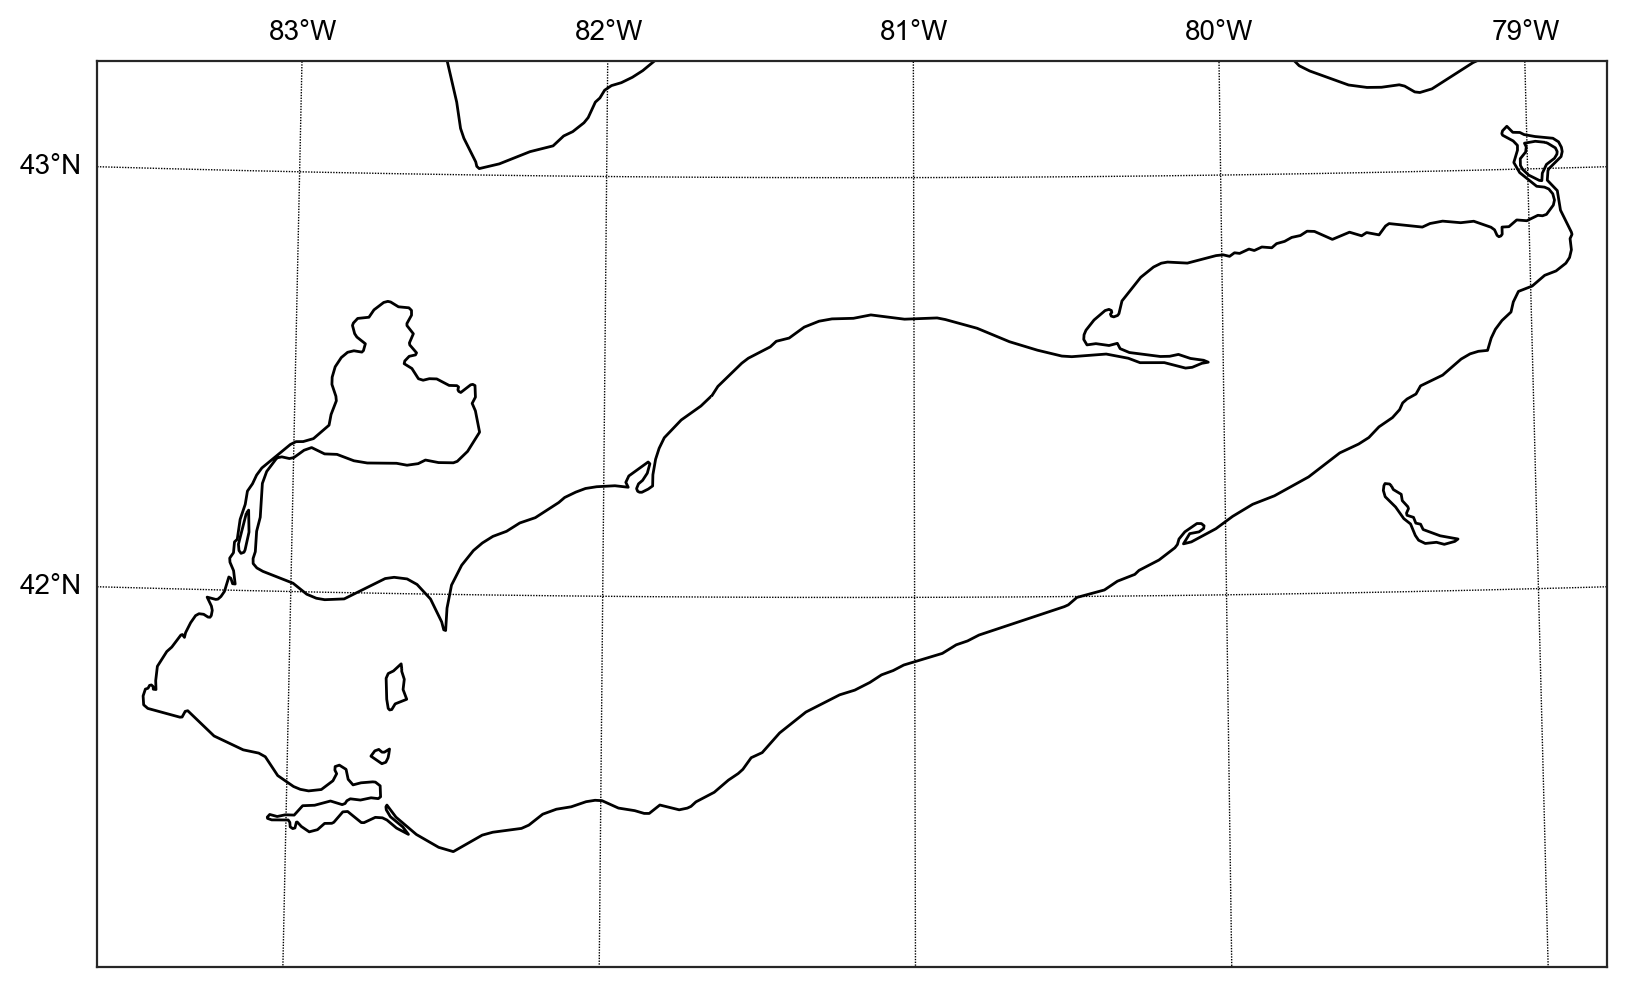

In [35]:



levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=200)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines()
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.gray_r)
# plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default


# m.plot(gauges.LATITUDE[0], gauges.LONGITUDE[0], 'bo', markersize=24)

# c = m.contourf(x,y,topo, levels=levels2,cmap=cmocean.cm.solar)
# cbar = m.colorbar(cax,location='bottom')

# cbar = m.colorbar(cs, location='bottom')
# cbar.set_label('Depth, m')
# plt.show()
plt.savefig('Bathymetry_bw.png',  transparent=True)


# In[97]:



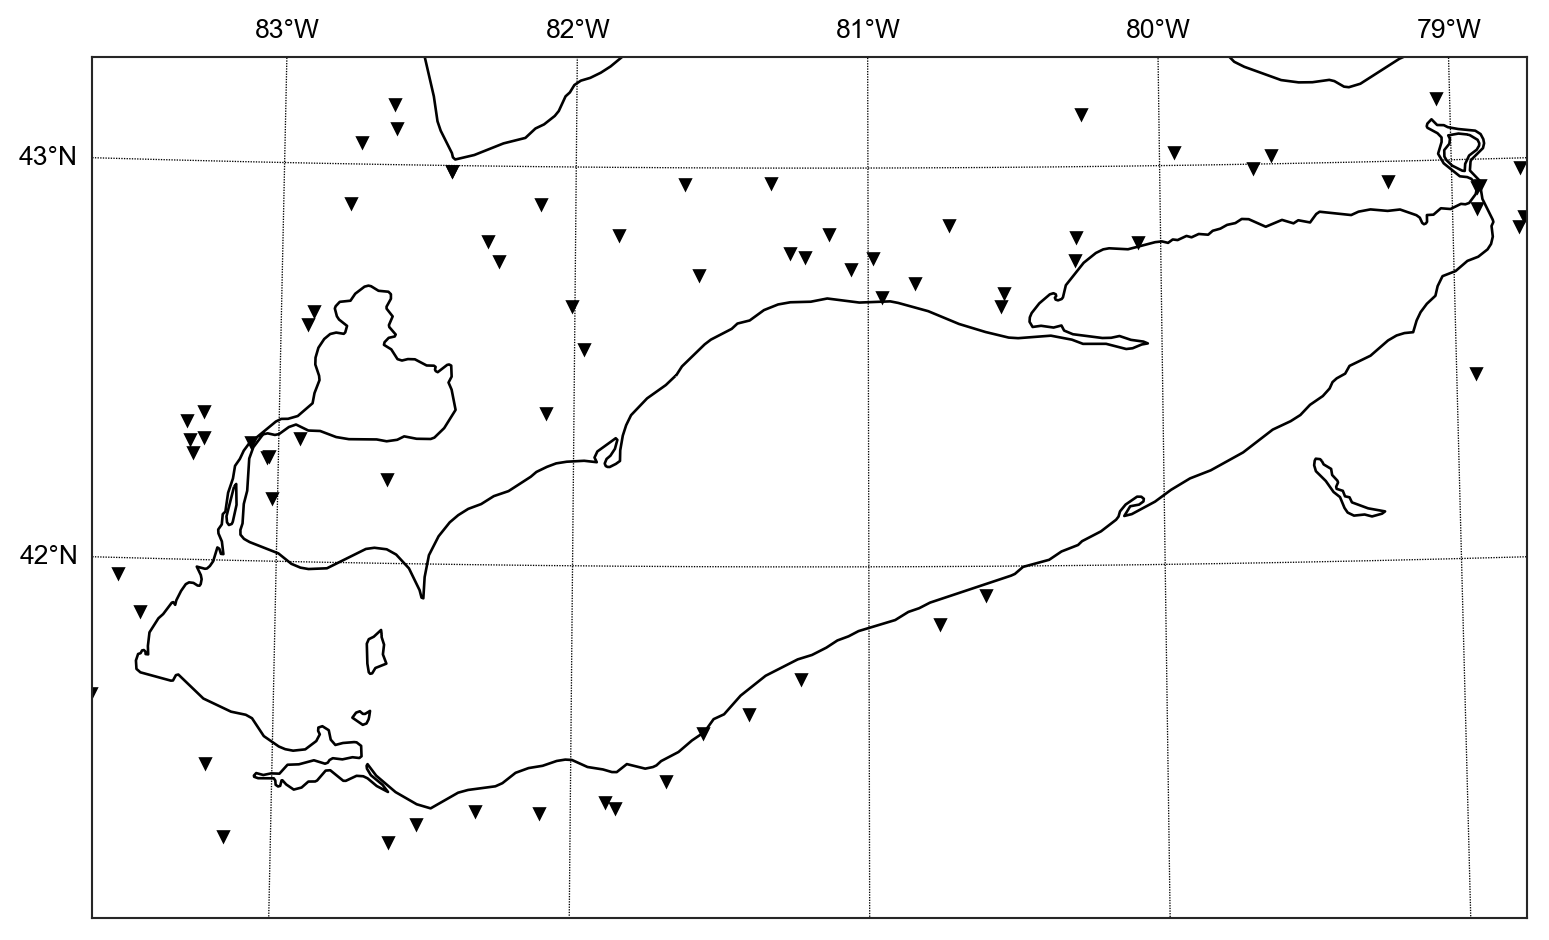

In [36]:
plt.figure(figsize=(12,6), dpi=190)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
# m.drawcoastlines()
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])?
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# CS = plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default



x1, y1 = m(gauges.LONGITUDE.values, gauges.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

# plt.savefig('Bathymetry_gauges.png', transparent=True)


/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


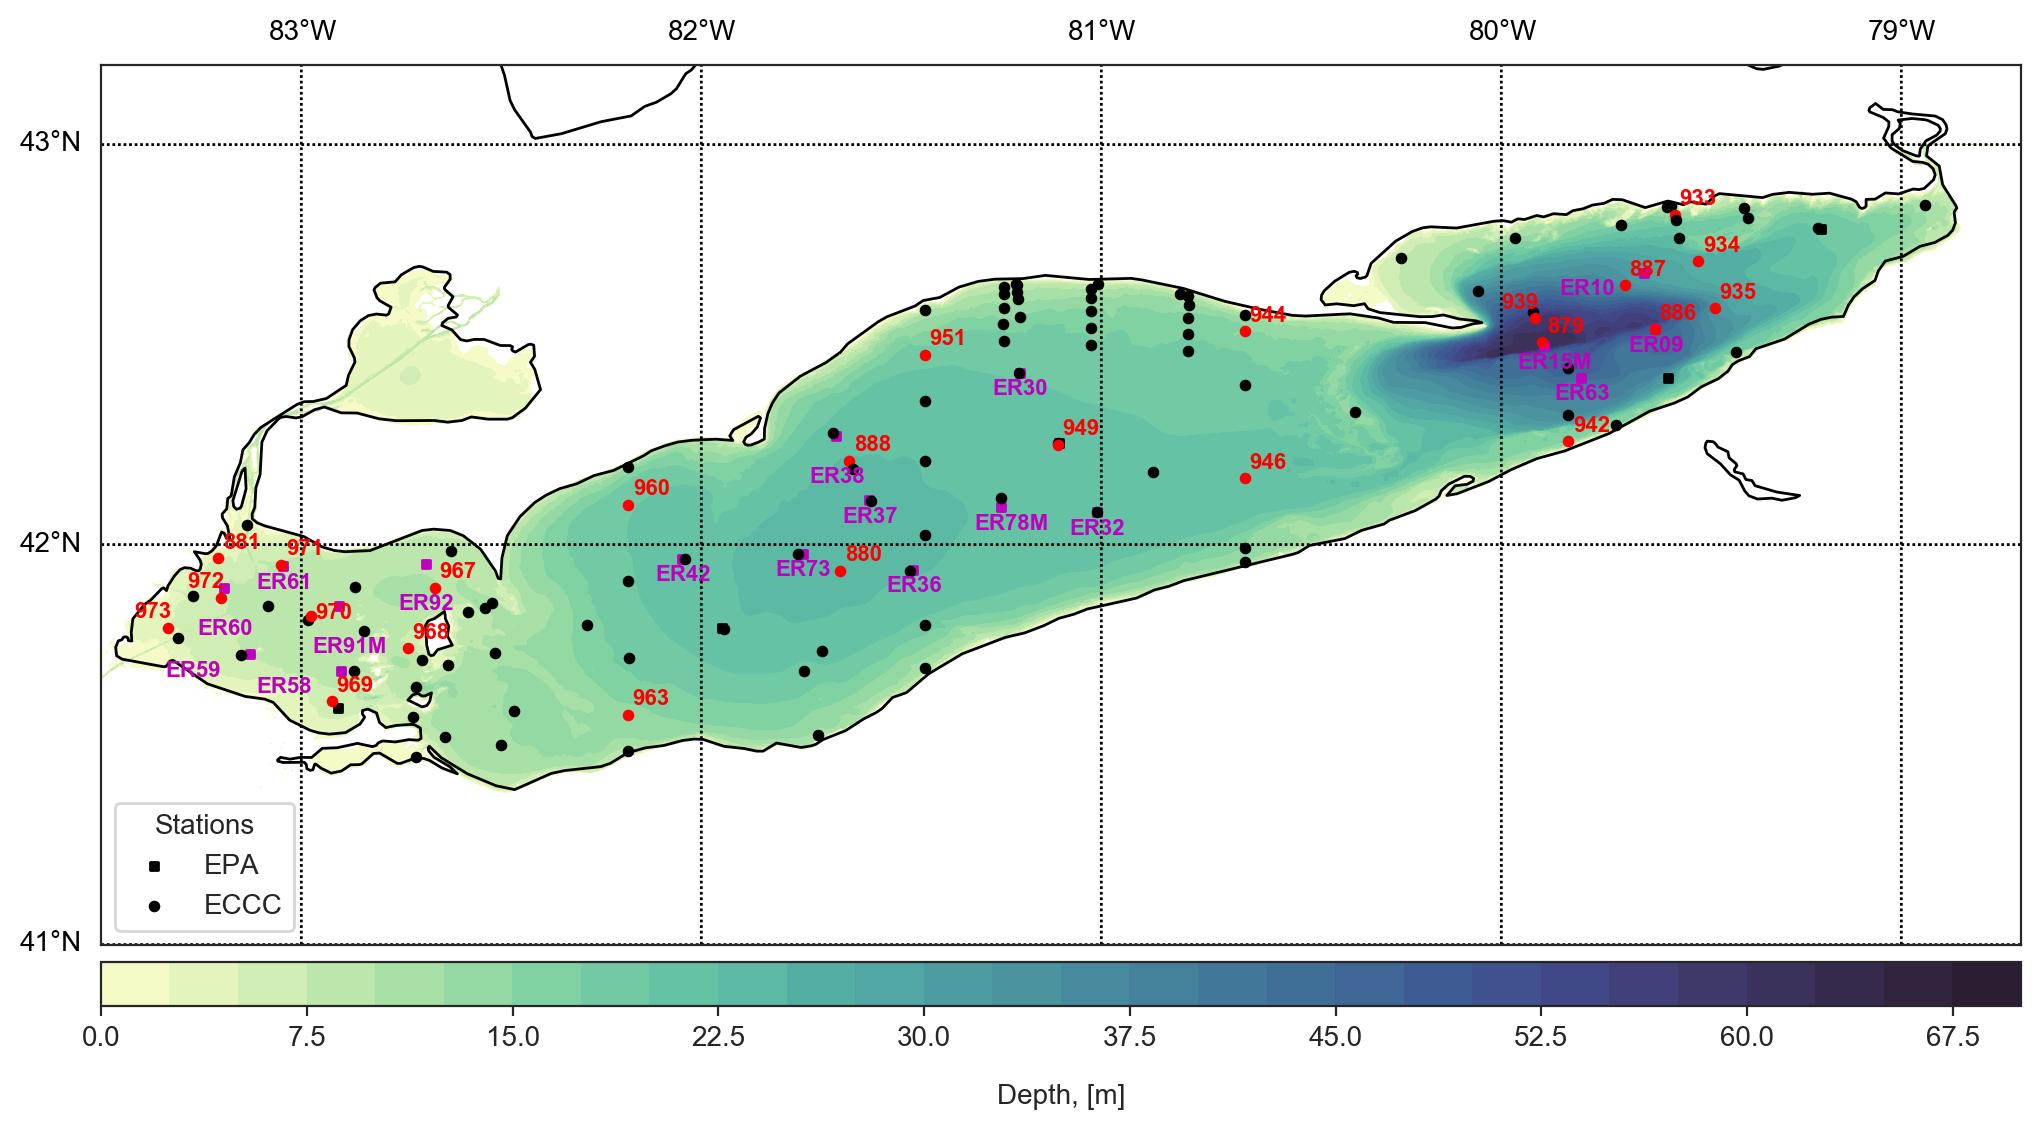

In [7]:

# coding: utf-8

# In[2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib qt
# %matplotlib osx
import numpy as np
import cmocean
import itertools
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy import interpolate
import statsmodels.api as sm
from adjustText import adjust_text

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())

# sns.set_palette('colorblind')


# In[3]:


from IPython.display import Image
Image(filename='/Users/imarkelo/git/Great-Lakes-Data/measurements/ECCC/Lake_Erie_map_with_stations-1.png') 


# In[4]:


df = pd.read_excel('../../measurements/ECCC/LakeErie_Markelov_Dove26May2017.xlsx', sheetname='Data')
ECCCmeas = df[df['DEPTH_TO']==0]
ECCCmeas['YEAR']=pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).year
ECCCmeas['MONTH']=pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).month
ECCCmeas = ECCCmeas[ECCCmeas['YEAR']>1999]
# Cl = Cl[Cl.QC_TYPE=='routine field sample']
# Cl = Cl[~Cl.DEPTH_CODE.isin(['Integrated, Spring', 'Integrated, Summer'])]
# Cl = Cl[Cl.YEAR>2002]
# Cl.loc[:,'SAMPLE_DEPTH_M'] *= -1


# In[5]:


eastern_basin_a = [448, 940, 879, 938, 450, 449, 451, 452, 447, 936,886,446, 445,934,935,444,441,443,442,440,439,438,931]
central_basin_a = [965, 962, 961, 954, 953, 952, 949, 945, 946]
western_basin_a = [971, 973, 974, 970, 966, 968, 969]


# In[6]:


eastern_basin_b = [937,939,941,942,887,1237,1236,933,727,932, 486, 67]
central_basin_b = [493,492,491,338,885,311,339,341,963,964,960,859,918,919,957,958,1326,880,920,956,955,899,915,889,888,916,951,950,896,897,898,1053,948,947,1223,1222,1221,1220,1219,1218,1217,1216,1215,1214,1213,1212,1211,1210,1209,1292,943,944,947,205,1048]
western_basin_b = [882, 733, 881, 1156, 972, 343, 357, 358, 344, 337, 967, 494, 495, 496]


# In[7]:


western_basin_f = list(filter(lambda x: x in  western_basin_a + western_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))
central_basin_f = list(filter(lambda x: x in  central_basin_a + central_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))
eastern_basin_f = list(filter(lambda x: x in  eastern_basin_a + eastern_basin_b, ECCCmeas.groupby(['PSN']).count().sort_values('CRUISE_PLAN', ascending=False).index))


# In[8]:


western_basin_f[:6]


# In[9]:


spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
       return 'Spring'
    if x in summer:
       return 'Summer'
    if x in fall:
       return 'Fall'
    else:
       return 'Winter'


# In[10]:


ECCCmeas['SEASON'] = pd.to_datetime(pd.DatetimeIndex(ECCCmeas['STN_DATE'])).dayofyear.map(season)


# In[11]:


ECCCmeas.loc[:,'DEPTH_FROM'] *= -1


# In[12]:


ECCCmeas = ECCCmeas[ECCCmeas['DEPTH_FROM']>-900]


# In[13]:


ECCCmeas['VALUE'] = pd.to_numeric(ECCCmeas['VALUE'], errors='coerce')
ECCCmeas['PSN'] = pd.to_numeric(ECCCmeas['PSN'], errors='coerce')
ECCCmeas['LATITUDE_DD'] = pd.to_numeric(ECCCmeas['LATITUDE_DD'], errors='coerce')
ECCCmeas['LONGITUDE_DD'] = pd.to_numeric(ECCCmeas['LONGITUDE_DD'], errors='coerce')


# In[14]:


stations = eastern_basin_f + central_basin_f + western_basin_f
years = range(2003,2018)
seasons = ['Spring', 'Summer']


# In[15]:


ECCCmeas.ABBREV.unique()


# In[16]:


ECCCmeas.FULL_NAME.unique()


# In[17]:


# ECCCmeas = ECCCmeas[ECCCmeas['PSN'].isin(eastern_basin + central_basin + western_basin)]
ECCCmeas = ECCCmeas[ECCCmeas['SEASON'].isin(seasons)]
# ECCCmeas['VALUE'] = pd.to_numeric(ECCCmeas['VALUE'], errors='coerce')


# In[18]:


ECCCmeas[~ECCCmeas['PSN'].isin(eastern_basin_f + central_basin_f + western_basin_f)].PSN.unique()


# In[19]:


PSNs_loc = ECCCmeas.groupby(['PSN']).mean()[['LATITUDE_DD', 'LONGITUDE_DD']].reset_index()


# In[20]:


nc = Dataset('../../measurements/bathymetry/erie_lld.grd')
topo = -nc.variables['z'][:] #[::10,::10]
x = nc.variables['x'][:] #[::10]
y = nc.variables['y'][:] #[::10]
lon, lat = np.meshgrid(x, y)


# In[21]:


levels1 = np.linspace(0,70,14*2+1)


# In[22]:


Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')


# In[23]:


GLENDA_stations = Cl.groupby(['STATION_ID']).mean()[['LATITUDE', 'LONGITUDE']].reset_index()


# In[24]:


GLENDA_stations['LATITUDE'] = pd.to_numeric(GLENDA_stations['LATITUDE'], errors='coerce')
GLENDA_stations['LONGITUDE'] = pd.to_numeric(GLENDA_stations['LONGITUDE'], errors='coerce')


# In[25]:


glenda_eastern_basin = ['ER15M', 'ER09', 'ER63', 'ER10']
glenda_central_basin = ['ER78M', 'ER38', 'ER37', 'ER42', 'ER30', 'ER73', 'ER36', 'ER32'] #, 'ER43','ER31']
glenda_western_basin = ['ER58', 'ER59', 'ER61', 'ER60', 'ER92', 'ER91M']



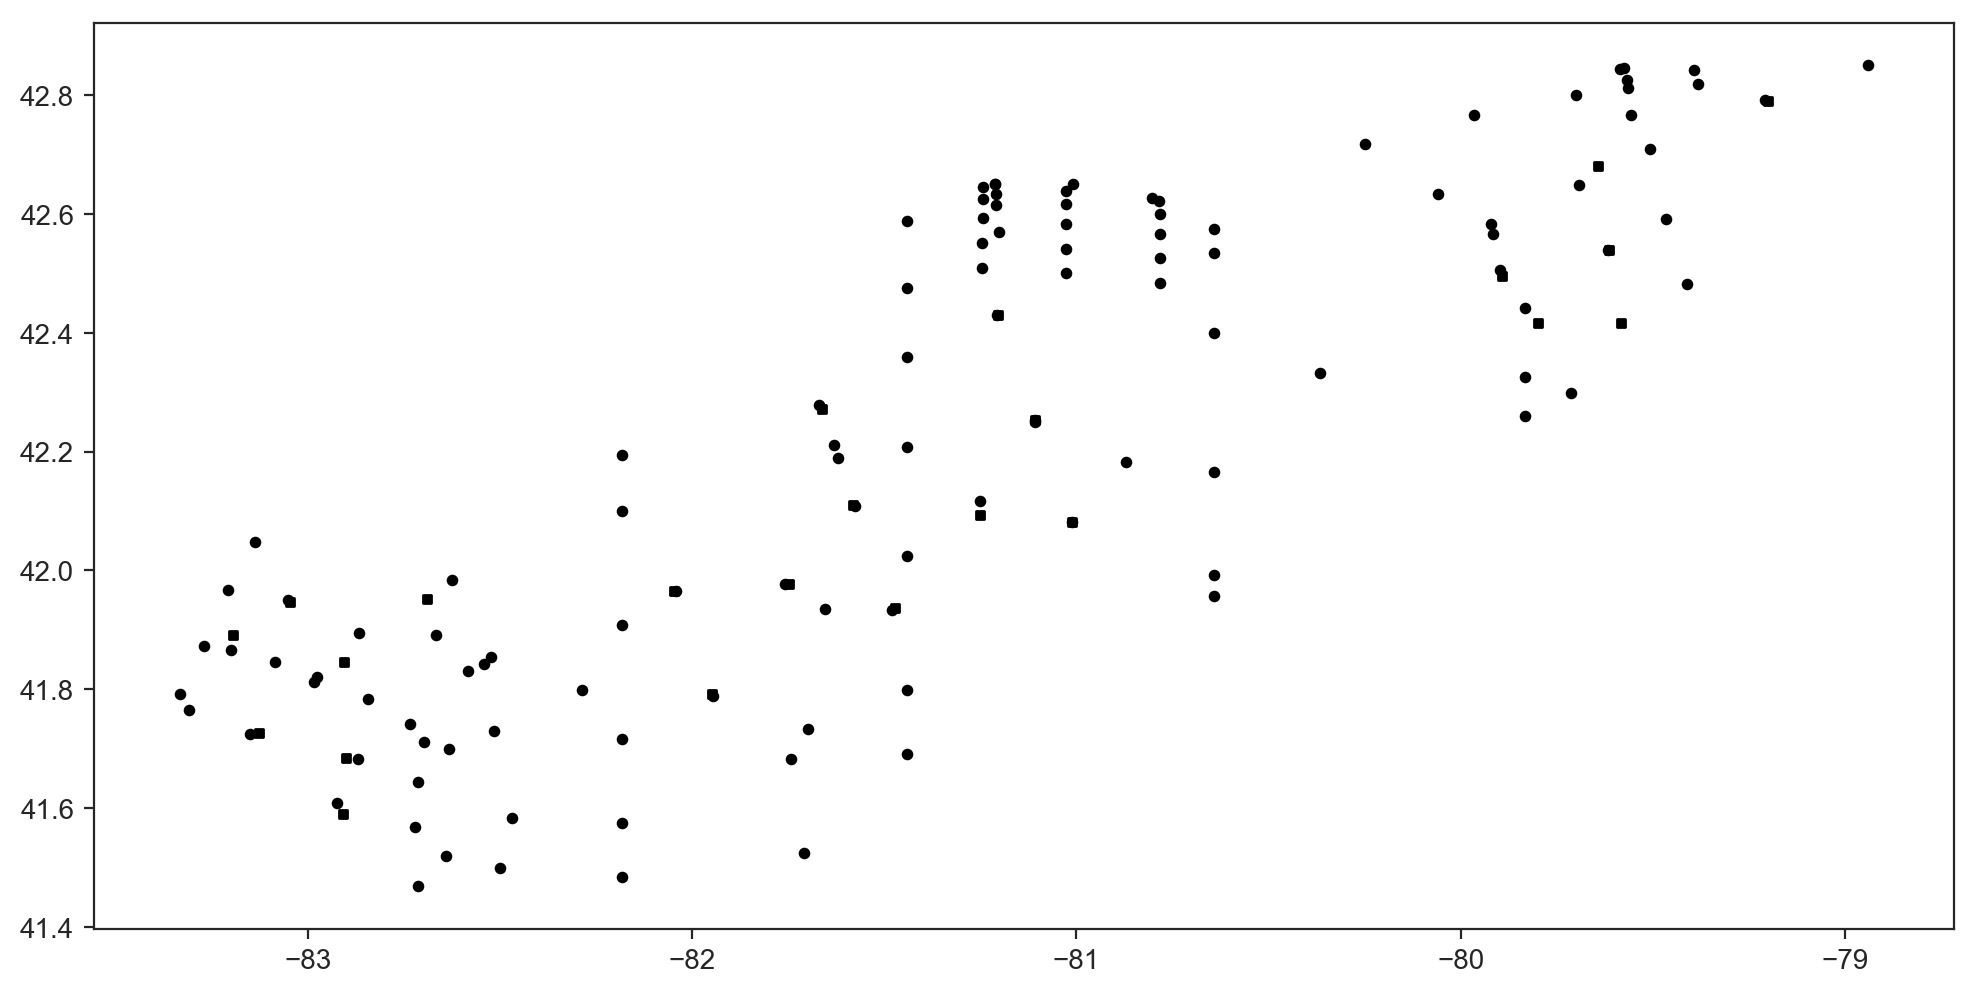

In [16]:
f=plt.figure(figsize=(12,6), dpi=200)

m = Basemap(width=500000*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
# m = Basemap(projection='cyl', lat_0=42.0+0.2,lon_0=-81.0-0.2)
# x, y = m(lon, lat)
# m.drawcoastlines()
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10)
# # plt.contour(x,y,topo, levels=levels1, colors='k')  # negative contours will be dashed by default
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# cbar = m.colorbar(cax,location='bottom')
# texts = []
for i,row in GLENDA_stations.iterrows():
    if row['STATION_ID'] in glenda_eastern_basin+glenda_central_basin + glenda_western_basin:
        plt.scatter(row['LONGITUDE'], row['LATITUDE'], color='k', s=10, marker='s')
#         texts.append(plt.text(row['LONGITUDE']-0.07, row['LATITUDE']-0.07, '{}'.format(row['STATION_ID']), fontsize=8, color='m', weight='bold'))
    else:
        a1=plt.scatter(row['LONGITUDE'], row['LATITUDE'], color='k', s=10, marker='s')
#         plt.text(row['LONGITUDE']+0.01, row['LATITUDE']+0.01, '{}'.format(row['STATION_ID']), fontsize=8, color='k')
for i,row in PSNs_loc.iterrows():
    if row['PSN'] in western_basin_f[:8]+central_basin_f[:8] + eastern_basin_f[:8]:
        plt.scatter(row['LONGITUDE_DD'], row['LATITUDE_DD'], color='k', s=10)
#         texts.append(plt.text(row['LONGITUDE_DD']+0.01, row['LATITUDE_DD']+0.01, '{0:.0f}'.format(row['PSN']), fontsize=8, color='r', weight='bold'))
    else:
        a2=plt.scatter(row['LONGITUDE_DD'], row['LATITUDE_DD'], color='k', s=10)

        #         plt.text(row['LONGITUDE_DD']+0.01, row['LATITUDE_DD']+0.01, '{0:.0f}'.format(row['PSN']), fontsize=4, color='k')

# adjust_text(texts)
# plt.legend([a1,a2], ['EPA','ECCC'], title='Stations')
# plt.text(0.5,-0.18,'Depth, [m]', horizontalalignment='center', transform=f.axes[0].transAxes)
# plt.tight_layout()
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# f.savefig('Mass Balance/GLENDA/All Stations/map_stations.pdf') 

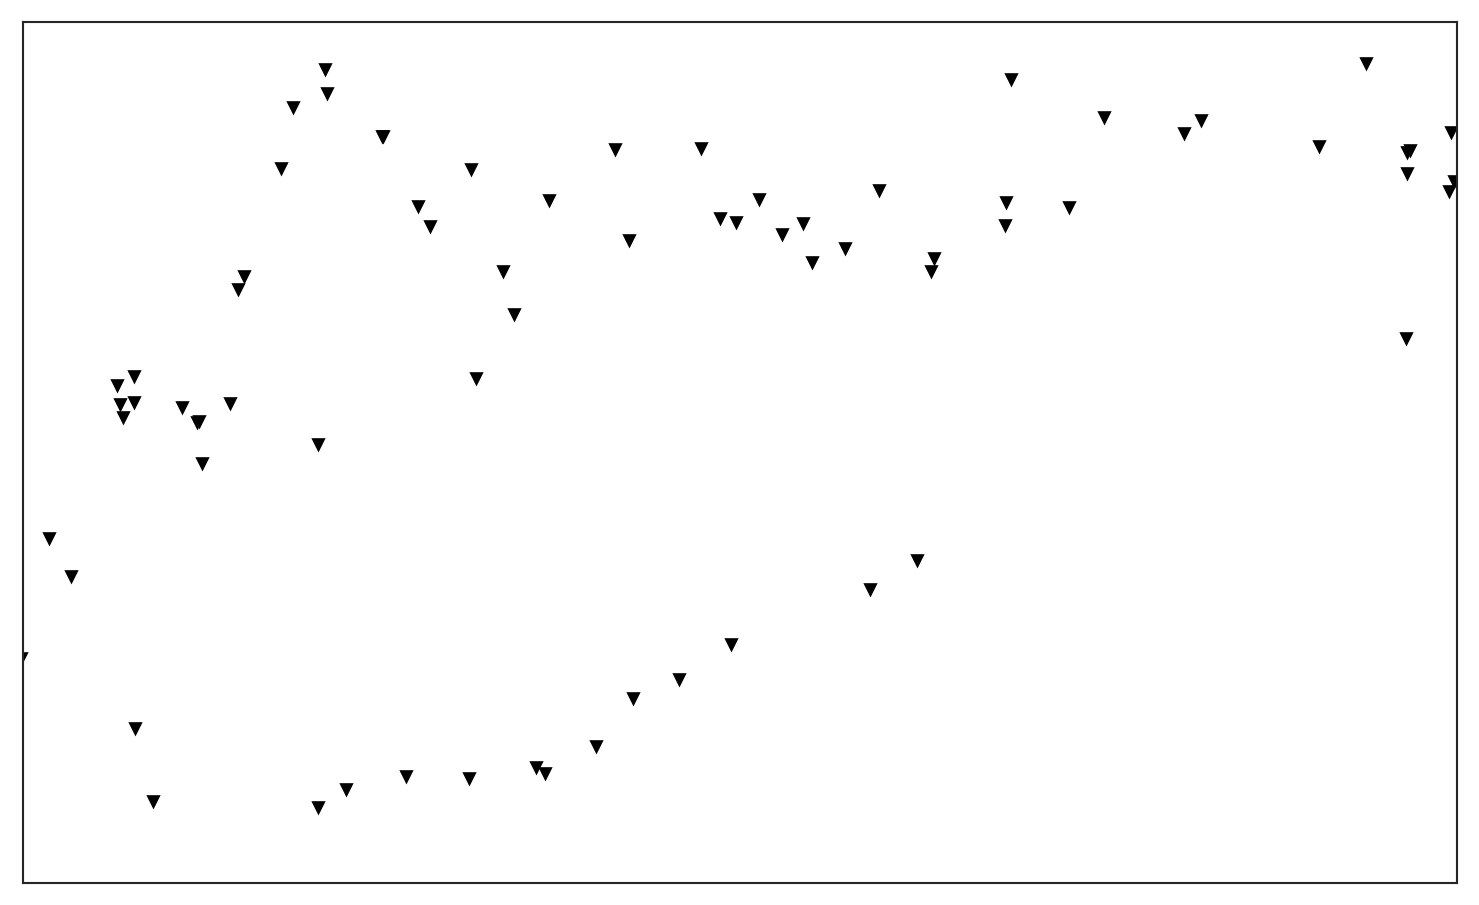

In [24]:
plt.figure(figsize=(12,6), dpi=190)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
# m.drawcoastlines()
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])?
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# CS = plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default

x1, y1 = m(gauges.LONGITUDE.values, gauges.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)










In [82]:
### Canadien WQ stations

In [51]:
PWQMN.head().columns

Index(['ABREVIATION', 'ANAL METH', 'ANALMETH', 'ANALMETHOD', 'DATE',
       'FIELD NO', 'FIELDNO', 'LIMS R', 'LIMS RCODE', 'PARAM CODE', 'PARM',
       'PARM DESCRIPTION', 'REMARK CODE', 'REMARK CODE1', 'RESULT', 'STATION',
       'STATION NO', 'TIME', 'UNITS', 'Unnamed: 0', 'VALQUALIFI',
       'VALUE QUALIFIER', 'VALUQUALIFI'],
      dtype='object')

In [64]:
PWQMN_IDS = [st for st in set(PWQMN_LOC.STATION.unique()).intersection(PWQMN.STATION.unique())]

In [73]:
PWQMN_coordinates = PWQMN_LOC[PWQMN_LOC.STATION.isin(PWQMN_IDS)][['LONGITUDE','LATITUDE']]

In [78]:

GLNI_coordinates = GLNI[["Latitude","Longitude"]]

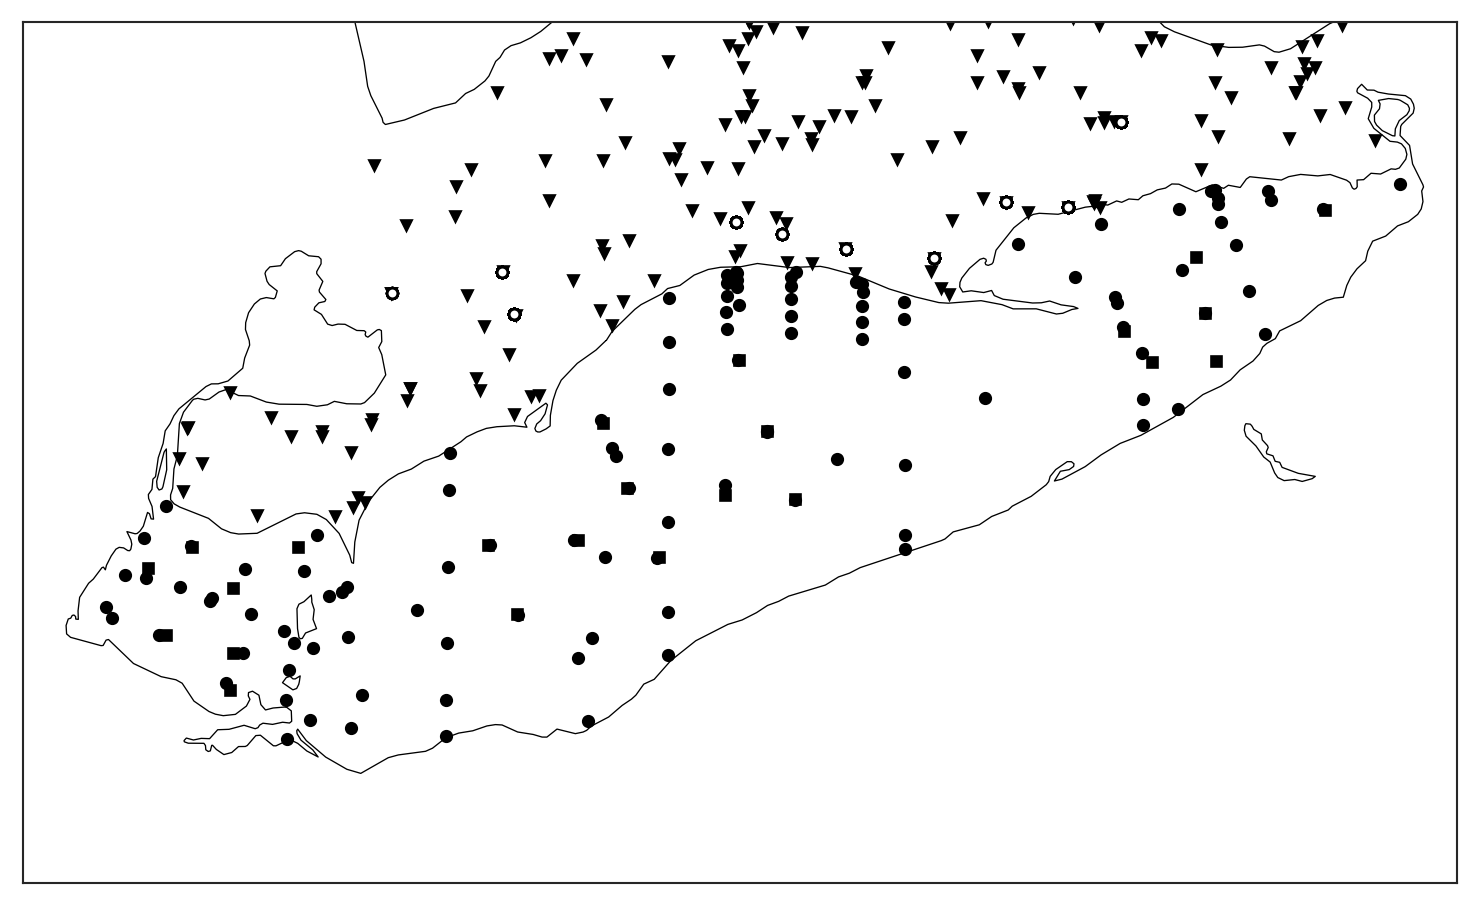

In [81]:
f = plt.figure(figsize=(12,6), dpi=190)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
# m.drawcoastlines()
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])?
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# CS = plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default


m.drawcoastlines(linewidth=0.5)
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)


# x1, y1 = m(gauges.LONGITUDE.values, gauges.LATITUDE.values)
# m.plot(x1, y1, 'v', markerfacecolor='k',
#              markeredgewidth=1,  markeredgecolor='k', markersize=4)


x1, y1 = m(GLENDA_stations.LONGITUDE.values, GLENDA_stations.LATITUDE.values)
m.plot(x1, y1, 's', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PSNs_loc.LONGITUDE_DD.values, PSNs_loc.LATITUDE_DD.values)
m.plot(x1, y1, 'o', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PWQMN_coordinates.LONGITUDE.values, PWQMN_coordinates.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(GLNI_coordinates.Longitude.values, GLNI_coordinates.Latitude.values)
m.plot(x1, y1, 'o', markerfacecolor='w',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)




f.savefig('water_stations.png', transparent=True) 


In [83]:
### US WQ stations

In [120]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/NEW YORK samples.zip').open(name='result.csv'))
PENNSYLVANIA_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/PENNSYLVANIA samples.zip').open(name='result.csv'))
ohio_samples = pd.concat([PENNSYLVANIA_samples, ohio_samples])

PENNSYLVANIA_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))
ohio_samples = pd.concat([PENNSYLVANIA_samples, ohio_samples])

PENNSYLVANIA_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))
ohio_samples = pd.concat([PENNSYLVANIA_samples, ohio_samples])



stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/PENNSYLVANIA stations.zip').open(name='station.csv'))
ohio_stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/NEW YORK stations.zip').open(name='station.csv'))
stations = pd.concat([stations, ohio_stations])

ohio_stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))
stations = pd.concat([stations, ohio_stations])

ohio_stations = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/USGS stream data/OHIO station info.csv')
stations = pd.concat([stations, ohio_stations])


location = (42.530984, -78.995377)



delta_xy = 10
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]



csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride")  & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              


/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,26,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/imarkelo/anaconda3/envs/phd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactiv

(193392, 63)

In [121]:
delta_xy = 5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]


US_coordinates = r_stations[r_stations.MonitoringLocationIdentifier.isin(df.MonitoringLocationIdentifier.values)]

In [148]:
import pickle

In [149]:
US_coordinates

,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationIdentifier,MonitoringLocationName,MonitoringLocationTypeName,MonitoringLocationDescriptionText,HUCEightDigitCode,DrainageAreaMeasure/MeasureValue,DrainageAreaMeasure/MeasureUnitCode,ContributingDrainageAreaMeasure/MeasureValue,...,CountyCode,AquiferName,FormationTypeText,AquiferTypeName,ConstructionDateText,WellDepthMeasure/MeasureValue,WellDepthMeasure/MeasureUnitCode,WellHoleDepthMeasure/MeasureValue,WellHoleDepthMeasure/MeasureUnitCode,ProviderName
9,USGS-MD,USGS Maryland Water Science Center,USGS-394805077504601,Replace NAWQA Site FR-811R,Well,NaN,2070004.0,NaN,NaN,NaN,...,55.0,NaN,Greenbrier Limestone,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
10,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353203,E5-45,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,46.77,ft,46.77,ft,NWIS
11,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353204,E5-60,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,53.92,ft,53.92,ft,NWIS
12,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353205,E4-10,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,18.11,ft,18.11,ft,NWIS
13,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353206,E4-20,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,24.40,ft,24.40,ft,NWIS
14,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353208,E4-45,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,45.21,ft,45.21,ft,NWIS
15,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353209,E4-60,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,65.11,ft,65.11,ft,NWIS
16,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353210,E3-10,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,13.95,ft,13.95,ft,NWIS
17,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353211,E3-20,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,22.92,ft,22.92,ft,NWIS
18,USGS-MD,USGS Maryland Water Science Center,USGS-404233076353212,E3-30,Well,NaN,2050301.0,NaN,NaN,NaN,...,107.0,NaN,NaN,NaN,NaN,32.69,ft,32.69,ft,NWIS


In [154]:
US_coordinates.to_pickle('US_coordinates_Chl.pkl')

In [155]:
df.to_pickle('usgs_measurements_Chl.pkl')

In [157]:
gauges.to_pickle('gauges_coordinates.pkl')

In [159]:
GLENDA_stations.to_pickle('GLENDA_coordinates.pkl')

In [160]:
PSNs_loc.to_pickle('PSNs_coordinates.pkl')

In [161]:
PWQMN_coordinates.to_pickle('PWQMN_coordinates.pkl')

In [162]:
GLNI_coordinates.to_pickle('GLNI_coordinates.pkl')

In [163]:
GLENDA.head()

NameError: name 'GLENDA' is not defined

In [ ]:




x1, y1 = m(GLENDA_stations.LONGITUDE.values, GLENDA_stations.LATITUDE.values)
m.plot(x1, y1, 's', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PSNs_loc.LONGITUDE_DD.values, PSNs_loc.LATITUDE_DD.values)
m.plot(x1, y1, 'o', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PWQMN_coordinates.LONGITUDE.values, PWQMN_coordinates.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(GLNI_coordinates.Longitude.values, GLNI_coordinates.Latitude.values)

In [125]:
US_coordinates.ProviderName.unique()

array(['NWIS', 'STORET', 'BIODATA'], dtype=object)

In [90]:
# Provider name for the source of data

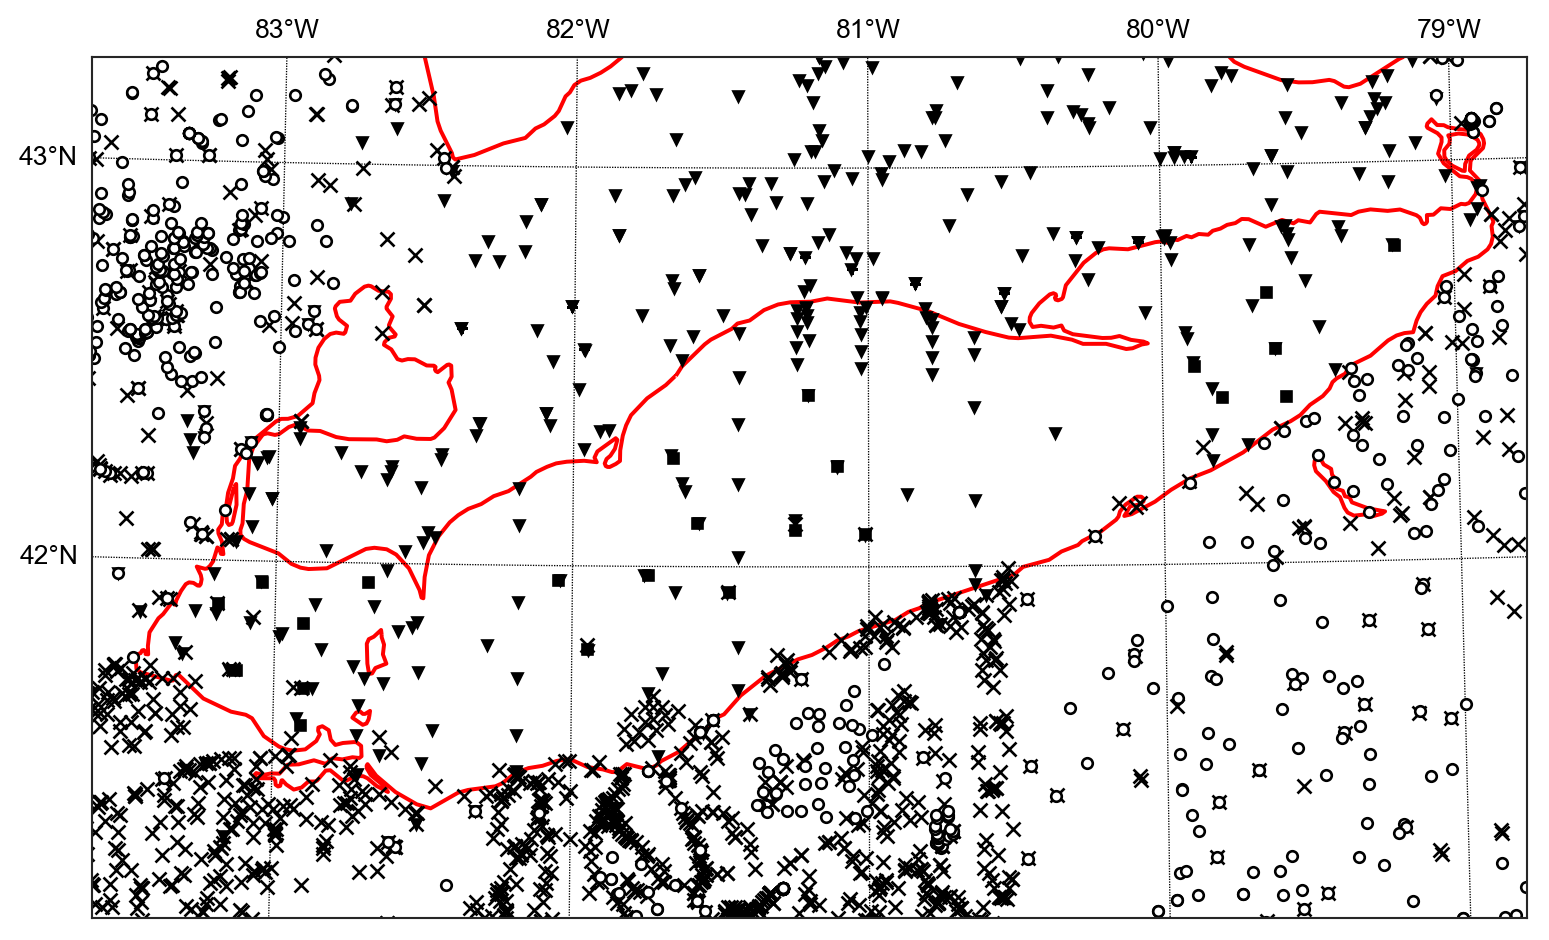

In [194]:
f = plt.figure(figsize=(12,6), dpi=190)
m = Basemap(width=500000*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lon_0-0.2)
# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
# m.drawcoastlines()
# m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
# m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])?
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# CS = plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default


m.drawcoastlines(linewidth=1.5, color='r')
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.5)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.5)


x1, y1 = m(gauges.LONGITUDE.values, gauges.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)


x1, y1 = m(GLENDA_stations.LONGITUDE.values, GLENDA_stations.LATITUDE.values)
m.plot(x1, y1, 's', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PSNs_loc.LONGITUDE_DD.values, PSNs_loc.LATITUDE_DD.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(PWQMN_coordinates.LONGITUDE.values, PWQMN_coordinates.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(GLNI_coordinates.Longitude.values, GLNI_coordinates.Latitude.values)
m.plot(x1, y1, '+', markerfacecolor='w',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

x1, y1 = m(US_coordinates[US_coordinates.ProviderName == 'STORET'].LongitudeMeasure.values, US_coordinates[US_coordinates.ProviderName == 'STORET'].LatitudeMeasure.values)
m.plot(x1, y1, 'x', markerfacecolor='w',
             markeredgewidth=1,  markeredgecolor='k', markersize=5)

x1, y1 = m(US_coordinates[US_coordinates.ProviderName == 'NWIS'].LongitudeMeasure.values, US_coordinates[US_coordinates.ProviderName == 'NWIS'].LatitudeMeasure.values)
m.plot(x1, y1, 'o', markerfacecolor='w',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)


# x1, y1 = m(us_used[us_used.ProviderName == 'STORET'].LongitudeMeasure.values, us_used[us_used.ProviderName == 'STORET'].LatitudeMeasure.values)
# m.plot(x1, y1, 'x', markerfacecolor='r',
#              markeredgewidth=1,  markeredgecolor='r', markersize=5)

# x1, y1 = m(us_used[us_used.ProviderName == 'NWIS'].LongitudeMeasure.values, us_used[us_used.ProviderName == 'NWIS'].LatitudeMeasure.values)
# m.plot(x1, y1, 'o', markerfacecolor='r',
#              markeredgewidth=1,  markeredgecolor='r', markersize=4)
# plt.tight_layout()
f.savefig('all_stations.pdf', transparent=True) 


In [114]:
delta_xy = 5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]


US_coordinates = r_stations[r_stations.MonitoringLocationIdentifier.isin(df.MonitoringLocationIdentifier.values)]

In [142]:
GLENDA.head()

NameError: name 'GLENDA' is not defined

In [116]:
US_coordinates.LongitudeMeasure.head().columns

Index(['OrganizationIdentifier', 'OrganizationFormalName',
       'MonitoringLocationIdentifier', 'MonitoringLocationName',
       'MonitoringLocationTypeName', 'MonitoringLocationDescriptionText',
       'HUCEightDigitCode', 'DrainageAreaMeasure/MeasureValue',
       'DrainageAreaMeasure/MeasureUnitCode',
       'ContributingDrainageAreaMeasure/MeasureValue',
       'ContributingDrainageAreaMeasure/MeasureUnitCode', 'LatitudeMeasure',
       'LongitudeMeasure', 'SourceMapScaleNumeric',
       'HorizontalAccuracyMeasure/MeasureValue',
       'HorizontalAccuracyMeasure/MeasureUnitCode',
       'HorizontalCollectionMethodName',
       'HorizontalCoordinateReferenceSystemDatumName',
       'VerticalMeasure/MeasureValue', 'VerticalMeasure/MeasureUnitCode',
       'VerticalAccuracyMeasure/MeasureValue',
       'VerticalAccuracyMeasure/MeasureUnitCode',
       'VerticalCollectionMethodName',
       'VerticalCoordinateReferenceSystemDatumName', 'CountryCode',
       'StateCode', 'CountyCode',

In [174]:
def fun(x):
    try:
        return float(x)
    except:
        return x
sts = [fun(s) for s in stations_used]

In [181]:
PWQMN[PWQMN.STATION.isin(sts)].groupby(['STATION'])[['RESULT']].describe()

RESULT                                                           \
              count        mean         std    min      25%     50%      75%   
STATION                                                                        
4.001000e+09    2.0   51.100000    9.616652   44.3   47.700   51.10   54.500   
4.001000e+09   82.0   79.426829   34.004931   14.7   59.675   70.70   88.300   
4.001301e+09  145.0   52.723448   19.425080    9.8   38.200   52.90   67.400   
4.001306e+09   70.0   65.430000   20.775804   28.9   48.150   67.15   78.450   
4.001308e+09   67.0   67.713433   19.503783   28.3   55.200   68.20   79.950   
4.002701e+09    2.0   36.200000    9.899495   29.2   32.700   36.20   39.700   
4.002701e+09   97.0   53.572165   20.272425   17.9   38.400   49.90   65.800   
4.002702e+09   95.0   22.593684    8.242299    9.0   15.600   22.10   28.250   
1.000010e+10    2.0  274.000000   50.911688  238.0  256.000  274.00  292.000   
1.000010e+10   83.0  232.384337  269.010744   38.7  131.500  180.00  243.000   
1.000020e+10   81.0  171.161728  115.458185   12.6   83.600  129.00  208.000   
1.600870e+10   64.0   75.568750   21.445138   24.5   63.450   79.05   89.500   
1.601090e+10    2.0   29.000000    0.000000   29.0   29.000   29.00   29.000   
1.601090e+10   89.0   30.625843    4.651406   15.7   28.300   31.10   33.400   
1.601240e+10    2.0   20.800000    0.000000   20.8   20.800   20.80   20.800   
1.601240e+10   33.0   23.648485    6.918098   18.8   20.400   21.80   24.400   
1.601240e+10   88.0   25.545455    3.081085   14.6   23.950   26.10   27.625   
1.601590e+10   88.0   55.817045   11.748272   25.0   50.775   54.35   61.575   
1.601590e+10    2.0   50.000000    0.000000   50.0   50.000   50.00   50.000   
1.601640e+10  122.0   40.300820   12.421046   19.6   32.250   37.60   45.600   
1.601840e+10   31.0   85.703226   37.763991   25.5   59.400   86.40   99.000   
1.601840e+10  130.0   70.620000   24.328598    0.2   53.600   70.80   89.775   
1.601841e+10  146.0   77.591781   29.076251   22.1   58.450   76.10   96.525   
1.601841e+10   54.0   80.401852   24.547901   26.3   63.075   82.95   96.875   

                      
                 max  
STATION               
4.001000e+09    57.9  
4.001000e+09   212.0  
4.001301e+09   104.0  
4.001306e+09   126.0  
4.001308e+09   107.0  
4.002701e+09    43.2  
4.002701e+09   125.0  
4.002702e+09    47.4  
1.000010e+10   310.0  
1.000010e+10  2280.0  
1.000020e+10   450.0  
1.600870e+10   126.0  
1.601090e+10    29.0  
1.601090e+10    39.6  
1.601240e+10    20.8  
1.601240e+10    58.8  
1.601240e+10    33.1  
1.601590e+10   114.0  
1.601590e+10    50.0  
1.601640e+10    91.6  
1.601840e+10   232.0  
1.601840e+10   118.0  
1.601841e+10   241.0  
1.601841e+10   135.0

In [140]:
us_used.shape

(143, 36)

In [164]:
ECCCmeas.head()

,CRUISE_PLAN,CRUISE_START_DATE,CRUISE_STOP_DATE,LAST_DATE_UPDATED,WATER_BODY,CSN,LATITUDE_DD,LONGITUDE_DD,PSN,SOUNDING,...,DETECTION,FLAG,SEQ_NO,VALUE,ABBREV,FULL_NAME,UNITS,YEAR,MONTH,SEASON
17950,200001001,2000-04-16,2000-04-20,2000-04-28,LAKE ERIE,1,42.8497,-78.9417,931,8.7,...,NaN,NaN,0,8.350,PH,PH,PH UNITS,2000,4,Spring
17951,200001001,2000-04-16,2000-04-20,2000-04-28,LAKE ERIE,1,42.8497,-78.9417,931,8.7,...,NaN,NaN,0,2.900,D ORG C,"CARBON,DISSOLVED ORGANIC",MG C/L,2000,4,Spring
17952,200001001,2000-04-16,2000-04-20,2000-04-28,LAKE ERIE,1,42.8497,-78.9417,931,8.7,...,NaN,NaN,0,0.207,POC,"CARBON,PARTICULATE ORGANIC",MG C/L,2000,4,Spring
17953,200001001,2000-04-16,2000-04-20,2000-04-28,LAKE ERIE,1,42.8497,-78.9417,931,8.7,...,NaN,NaN,0,13.780,D 02 W,"OXYGEN,CONCENTRATION DISSOLVED",MG 02/L,2000,4,Spring
17954,200001001,2000-04-16,2000-04-20,2000-04-28,LAKE ERIE,1,42.8497,-78.9417,931,8.7,...,NaN,NaN,0,112.000,SAT 02,"OXYGEN,% SAT. DISSOLVED",PERCENT,2000,4,Spring


In [134]:
stations_used = ['USGS-04165553', '21MICH_WQX-740415', '21MICH-740377', '21MICH_WQX-740451', '21MICH-740388', 'USGS-04160075', '21MICH_WQX-740267', 'PointEdward', 'PortLambton', '4001308202', '4001300782', '4001305802', 'ON02GE1000', '4002701702', 'ON02GC1800', '4002700602', 'ON02GG1000', '4002700802', '4001000302', '4001000202', 'USGS-04168550', '21MICH_WQX-820070', 'USGS-04167150', '21MICH_WQX-821522', 'USGS-04166500', 'USGS-422154083244706', '21MICH-580364', '21MICH_WQX-580364', 'USGS-04175100', 'USGS-04174500', '21MICH-580046', 'USGS-04176540', '21MICH_WQX-580046', 'USGS-04176500', 'HTLP(NCWQR)', '21OHIO_WQX-301641', '21OHIO_WQX-201838', '21OHIO_WQX-301644', 'HTLP(NCWQR)', '21OHIO_WQX-500080', 'USGS-04193500', '21OHIO_WQX-303008', '21OHIO_WQX-500170', '21OHIO_WQX-S99Q01', '21OHIO_WQX-S02S23', '21OHIO_WQX-S02S14', '21OHIO_WQX-S02P06', '21OHIO_WQX-S02S16', '21OHIO_WQX-S02S03', '21OHIO_WQX-S02S05', 'HTLP(NCWQR)', '10000100302', '10000100202', '10000200202', '21MICH_WQX-820414', '21MICH_WQX-820017', '21OHIO_WQX-U04Q01', '21OHIO_WQX-U04S17', '21OHIO_WQX-U04S18', '21OHIO_WQX-500890', '21OHIO_WQX-U04W11', '21OHIO_WQX-U04S23', '21OHIO_WQX-U04T02', 'HTLP(NCWQR)', '21OHIO_WQX-K01E05', '21OHIO_WQX-501030', 'USGS-04199000', '21OHIO_WQX-K01G16', 'HTLP(NCWQR)', '21OHIO_WQX-B01K29', '21OHIO_WQX-B01K32', '21OHIO_WQX-B01S22', '21OHIO_WQX-B01K51', '21OHIO_WQX-B01S15', '21OHIO_WQX-B01S14', '21OHIO_WQX-B01S06', '21OHIO_WQX-B01K53', '21OHIO_WQX-501510', '21OHIO_WQX-B01E01', '21OHIO_WQX-B01W07', '21OHIO_WQX-B01S09', 'USGS-04200500', '21OHIO_WQX-T01K02', '21OHIO_WQX-T01P02', '21OHIO_WQX-T01W03', '21OHIO_WQX-501790', '21OHIO_WQX-T01W09', '21OHIO_WQX-302626', '21OHIO_WQX-T01W12', '21OHIO_WQX-T01W13', '21OHIO_WQX-501780', '21OHIO_WQX-501770', '21OHIO_WQX-T01W18', '21OHIO_WQX-T01W19', '21OHIO_WQX-501850', '21OHIO_WQX-502140', '21OHIO_WQX-302579', '21OHIO_WQX-302578', '21OHIO_WQX-302580', '21OHIO_WQX-F01S08', '21OHIO_WQX-302581', '21OHIO_WQX-F01A42', '21OHIO_WQX-200013', '21OHIO_WQX-F01A21', '21OHIO_WQX-F01W43', 'USGS-04208504', '21OHIO_WQX-502130', '21OHIO_WQX-502020', '11NPSWRD-CUVA_NPS_STRO', '21OHIO_WQX-F01S11', '21OHIO_WQX-502400', '21OHIO_WQX-200572', '21OHIO_WQX-502520', '21OHIO_WQX-G02S14', 'USGS-04212100', 'USGS-04211820', '21OHIO_WQX-G02K52', '21OHIO_WQX-G02K54', '21OHIO_WQX-300187', '21OHIO_WQX-G01K08', '21OHIO_WQX-G01K07', '21OHIO_WQX-502800', '21OHIO_WQX-502780', '21OHIO_WQX-A01K02', '21OHIO_WQX-A01K03', '21OHIO_WQX-502790', '21OHIO_WQX-301398', '21OHIO_WQX-502760', '21OHIO_WQX-A01K07', '21OHIO_WQX-A01K09', '21OHIO_WQX-A01W20', '21OHIO_WQX-502810', '21OHIO_WQX-A01S02', '21OHIO_WQX-301388', '21OHIO_WQX-A01P07', '21OHIO_WQX-A01P05', '21OHIO_WQX-502870', '21OHIO_WQX-A01Q02', '21OHIO_WQX-303288', '21OHIO_WQX-502890', '21OHIO_WQX-A01P09', '21OHIO_WQX-502900', '16010900102', 'ON02GC1300', '16010900802', '16008701002', 'ON02GC1500', '21NYDECA-01041302B', '21NYDECA_WQX-01041302B', 'USGS-04213500', 'USGS-04213470', '21NYDECA_WQX-01042600', 'USGS-04213453', 'USGS-04213426', '21NYDECA_WQX-01031002', '21NYDECA-01032101B', 'USGS-04215500', '21NYDECA-01032311', 'USGS-04214500', '21NYDECA-01032204', '21NYDECA_WQX-01033200', 'USGS-04215000', '21NYDECA_WQX-01033101', 'ON02GC1600', '16018409202', '16018412802', '16018402402', '16018402702', 'ON02GC1000', '16016400102', '16015900902', 'ON02GC1100', '16015900302', '16012400302', '16012401002', 'ON02GC1200', '16012401102', 'ON02HA0045', 'USGS-04219501', 'ON02HA0019', '21NYDECA_WQX-01010001']


In [ ]:
ECCCmeas.

In [135]:
len(stations_used)

181

In [138]:
us_used = US_coordinates[US_coordinates.MonitoringLocationIdentifier.isin(stations_used)]